In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nemo.analysis
# set matplotlib style. You can create your own style file and use it here
plt.style.use(['../nemoview/dashstyle.mplstyle'])

# Absorption Spectrum

In [34]:
### Absorption spectra
data = pd.read_csv("Ensemble_S0_.lx")

#nemo.analysis.absorption(initial,dielec,data=None, save=False, detailed=False, nstates=-1)
#initial: initial state (string)
#dielec: dielectric constant, refractive index of solvent (tuple)
#data: pandas dataframe with the data
#save: save the spectra in a file (boolean)
#detailed: adds some extra information, not relevant for plotting (boolean)
#nstates: number of excited states to be considered (-1 means all) (integer) 

spectra = nemo.analysis.absorption("S0",(4.71,1.446),data,nstates=-1,detailed=False)  
# spectra is a pandas dataframes that can be visualized as follows:
spectra


,Energy,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Total,Error
0,2.639084,0.000012,6.854750e-52,6.752196e-102,1.370192e-149,6.178956e-254,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000012,0.000012
1,2.649126,0.000019,1.816911e-50,5.261680e-100,1.578944e-147,3.153286e-251,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000019,0.000019
2,2.659169,0.000030,4.571219e-49,3.925632e-98,1.758091e-145,1.555168e-248,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000030,0.000030
3,2.669211,0.000042,1.091659e-47,2.804145e-96,1.891495e-143,7.412368e-246,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000042,0.000042
4,2.679254,0.000057,2.474564e-46,1.917773e-94,1.966338e-141,3.414304e-243,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000057,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,5.932999,0.000000,4.000401e-222,3.349444e-191,8.608861e-117,1.564364e-69,2.446836e-52,2.645168e-37,2.422110e-25,2.266990e-11,0.000034,0.000034,0.000032
329,5.943041,0.000000,1.001089e-224,6.576226e-194,1.221987e-118,1.546886e-71,7.694956e-54,1.109136e-38,1.109190e-26,5.421007e-12,0.000025,0.000025,0.000024
330,5.953084,0.000000,2.416948e-227,1.236743e-196,1.675875e-120,1.425381e-73,2.494488e-55,4.355655e-40,4.639556e-28,1.209550e-12,0.000018,0.000018,0.000017
331,5.963126,0.000000,5.629737e-230,2.229479e-199,2.220049e-122,1.223928e-75,8.508640e-57,1.601975e-41,1.773568e-29,2.518045e-13,0.000012,0.000012,0.000012


(0.0, 0.7433419527184455)

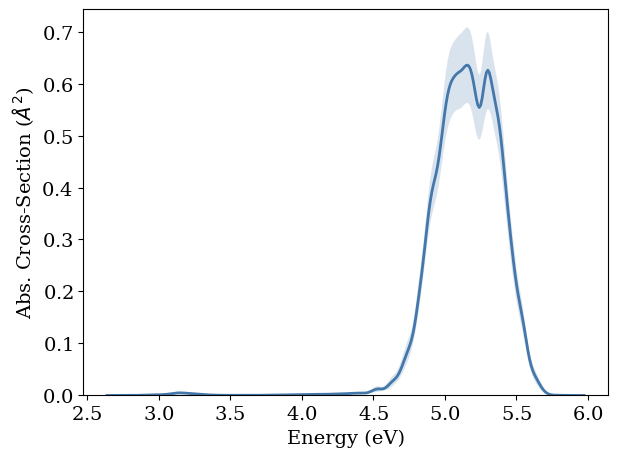

In [35]:
fig, ax = plt.subplots()

x = spectra['Energy']
y = spectra['Total']
err = spectra['Error']

ax.plot(x,y)
ax.fill_between(x,y-err,y+err,alpha=0.2)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Abs. Cross-Section ($\AA^2$)")
ax.set_ylim(bottom=0)

# Emission Spectrum and Rates

In [36]:
data2 = pd.read_csv("Ensemble_S1_.lx")
#rates(initial,dielec,data=None,ensemble_average=False, detailed=False)
#initial: initial state (string)
#dielec: dielectric constant, refractive index of solvent (tuple)
#data: pandas dataframe with the data
#ensemble_average: average over the ensemble instead of weighted average (boolean)
#detailed: adds some extra information, not relevant for plotting (boolean)

rates_s1, spectra_s1 = nemo.analysis.rates("S1",(4.71,1.446),data2,detailed=False)
# rates and spectra are pandas dataframes that can be visualized as follows:
display(rates_s1)
display(spectra_s1)


,Transition,Rate(s^-1),Error(s^-1),Prob(%),AvgDE+L(eV),AvgSOC(meV),AvgSigma(eV),AvgConc(%)
0,S1->S0,6.838319e+05,7.162626e+04,3.621079e-01,2.766297,NaN,0.103941,40.315636
1,S1~>T1,1.090028e+03,3.642292e+02,5.771999e-04,-0.148808,0.042308,0.036301,1.763191
2,S1~>T2,1.881626e+08,1.880418e+08,9.963731e+01,0.006794,1.005147,0.040375,0.200257
3,S1~>T3,3.875117e-05,3.874903e-05,2.051982e-11,0.283847,0.903529,0.037211,0.200022
4,S1~>T4,3.267029e-36,3.261105e-36,1.729982e-42,0.635412,1.073348,0.044748,0.200726
5,S1~>T5,1.273110e-61,9.092213e-62,6.741468e-68,0.708073,0.968021,0.039594,0.391371


,TDM,Energy,Diffrate,Error
0,0.183828,1.823478,2.682370e-13,1.421087e-13
1,0.183828,1.833553,3.351115e-13,1.731012e-13
2,0.183828,1.843629,4.157514e-13,2.090705e-13
3,0.183828,1.853705,5.122967e-13,2.504026e-13
4,0.183828,1.863780,6.270835e-13,2.974303e-13
...,...,...,...,...
168,0.183828,3.516182,7.807288e-13,4.350577e-13
169,0.183828,3.526258,6.099297e-13,3.366977e-13
170,0.183828,3.536333,4.738643e-13,2.596829e-13
171,0.183828,3.546409,3.660920e-13,1.996721e-13


(0.0, 8.992392268227727e-10)

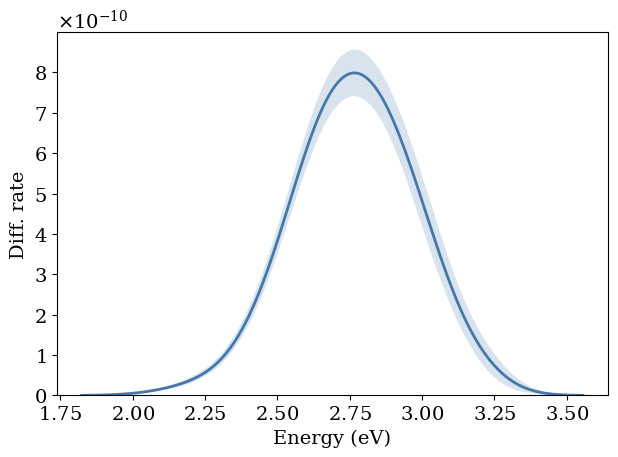

In [37]:
fig, ax = plt.subplots()

x = spectra_s1['Energy']
y = spectra_s1['Diffrate']
err3 = spectra_s1['Error']
ax.plot(x,y)
ax.fill_between(x,y-err3,y+err3,alpha=0.2)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Diff. rate")
ax.set_ylim(bottom=0)



In [38]:
data3 = pd.read_csv("Ensemble_T1_.lx")

rates_t1, spectra_t1 = nemo.analysis.rates("T1",(4.71,1.446),data3,detailed=False)
# rates and spectra are pandas dataframes that can be visualized as follows:
display(rates_t1)
display(spectra_t1)

,Transition,Rate(s^-1),Error(s^-1),Prob(%),AvgDE+L(eV),AvgSOC(meV),AvgSigma(eV),AvgConc(%)
0,T1->S0,2.192224e+00,1.617770e-01,1.005032e-01,2.473563,NaN,0.103548,7.061616e+01
1,T1~>S0,4.306394e-24,4.305516e-24,1.974280e-25,1.243931,0.232296,0.105910,2.000814e-01
2,T1~>S1,2.179056e+03,1.069040e+03,9.989950e+01,0.128305,0.029788,0.036312,8.257469e-01
3,T1~>S2,1.007872e-28,8.368453e-29,4.620622e-30,0.573701,1.112831,0.044219,2.898407e-01
4,T1~>S3,1.853364e-70,1.853364e-70,8.496808e-72,0.728071,0.646424,0.038502,2.000000e-01
5,T1~>S4,9.142450e-97,9.142450e-97,4.191385e-98,1.209540,1.344680,0.055153,2.000000e-01
6,T1~>S5,1.247613e-195,0.000000e+00,5.719721e-197,1.615075,0.546356,0.052883,1.797693e+308


,TDM,Energy,Diffrate,Error
0,0.000557,1.032103,5.263669e-19,3.800910e-19
1,0.000557,1.042161,6.452727e-19,4.604340e-19
2,0.000557,1.052219,7.847106e-19,5.530355e-19
3,0.000557,1.062278,9.467014e-19,6.586651e-19
4,0.000557,1.072336,1.133133e-18,7.779022e-19
...,...,...,...,...
207,0.000557,3.114137,2.187032e-17,6.644742e-18
208,0.000557,3.124196,1.761203e-17,5.533929e-18
209,0.000557,3.134254,1.408320e-17,4.569760e-18
210,0.000557,3.144312,1.118091e-17,3.741231e-18


(0.0, 2.6707664419919732e-15)

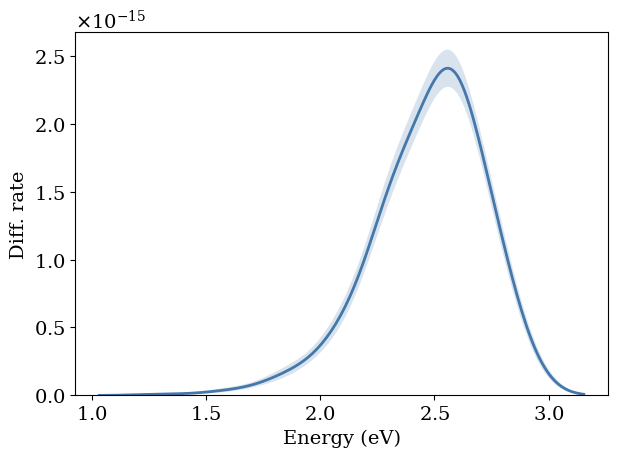

In [39]:
fig, ax = plt.subplots()

x = spectra_t1['Energy']
y = spectra_t1['Diffrate']
err3 = spectra_t1['Error']
ax.plot(x,y)
ax.fill_between(x,y-err3,y+err3,alpha=0.2)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Diff. rate")
ax.set_ylim(bottom=0)
